In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('C:\\Users\\Home\\Downloads\\bmi_train.csv')
df_validate = pd.read_csv('C:\\Users\\Home\\Downloads\\bmi_validation.csv')


In [7]:
df_train.shape, df_validate.shape

((400, 4), (100, 3))

In [8]:
df_train

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2
...,...,...,...,...
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
df_train.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [11]:
#Check for duplicates
df_train.duplicated().sum()

8

In [12]:
#Drop duplicates
df_train.drop_duplicates(keep='first', inplace=True)

In [13]:
df_train.shape

(392, 4)

In [14]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df_train['Gender'].value_counts()

Gender
Male      197
Female    195
Name: count, dtype: int64

In [16]:
df_train['Gender'] = df_train['Gender'].replace({'Male':0, 'Female':1})

C:\Users\Home\AppData\Local\Temp\ipykernel_9376\1298715890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Gender'] = df_train['Gender'].replace({'Male':0, 'Female':1})


In [17]:
df_train.describe()

,Gender,Height,Weight,Index
count,392.000000,392.000000,392.000000,392.000000
mean,0.497449,170.339286,106.224490,3.737245
std,0.500632,16.615701,32.510012,1.379366
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,171.000000,107.000000,4.000000
75%,1.000000,184.000000,137.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [18]:
df_train

,Gender,Height,Weight,Index
0,0,161,89,4
1,0,179,127,4
2,0,172,139,5
3,0,153,104,5
4,0,165,68,2
...,...,...,...,...
395,0,166,160,5
396,0,145,130,5
397,0,178,138,5
398,0,168,158,5


In [19]:
X = df_train.drop('Index', axis=1)
Y = df_train['Index']

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

<Axes: xlabel='Height', ylabel='Density'>

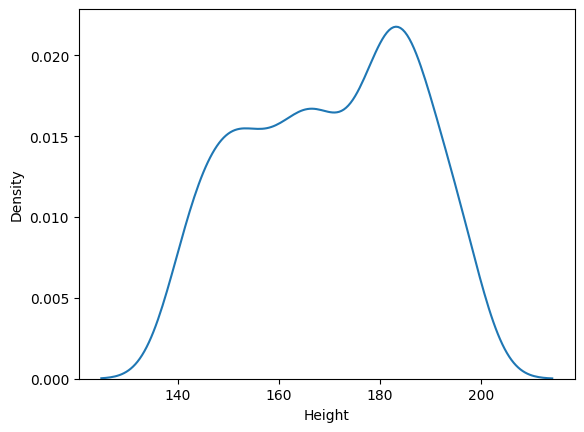

In [21]:
sns.kdeplot(x=df_train['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

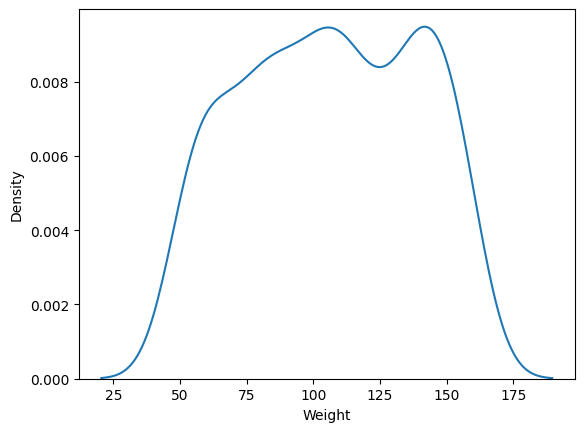

In [22]:
sns.kdeplot(x=df_train['Weight'])

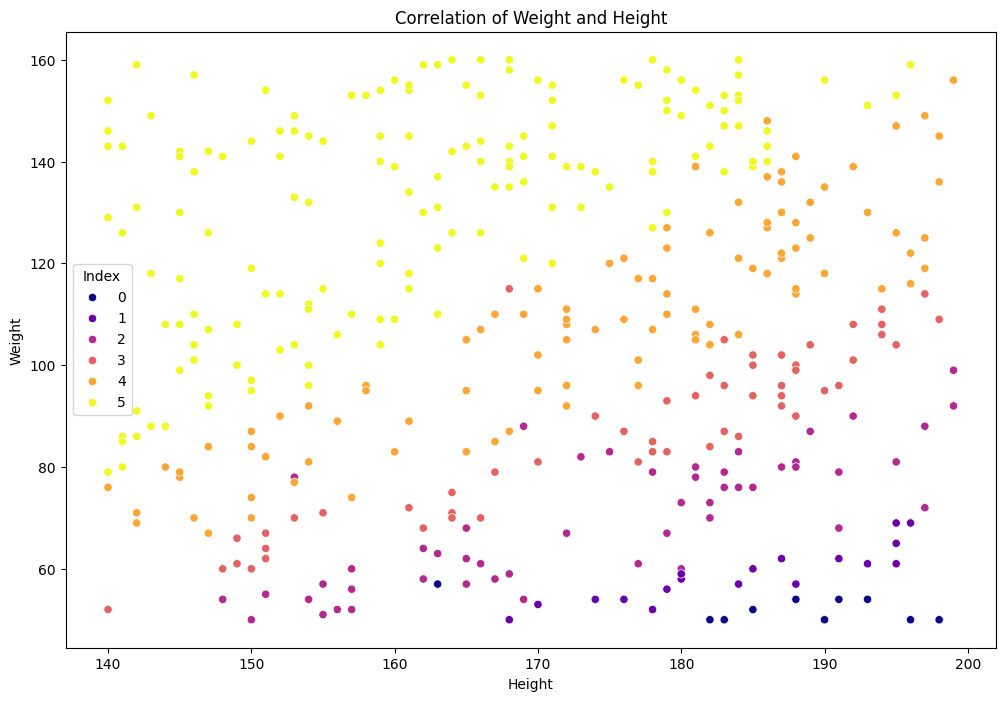

In [23]:
#Let's visualize the correlation of height and weight
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_train, x='Height', y='Weight', hue='Index', palette='plasma')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Correlation of Weight and Height')
plt.show()

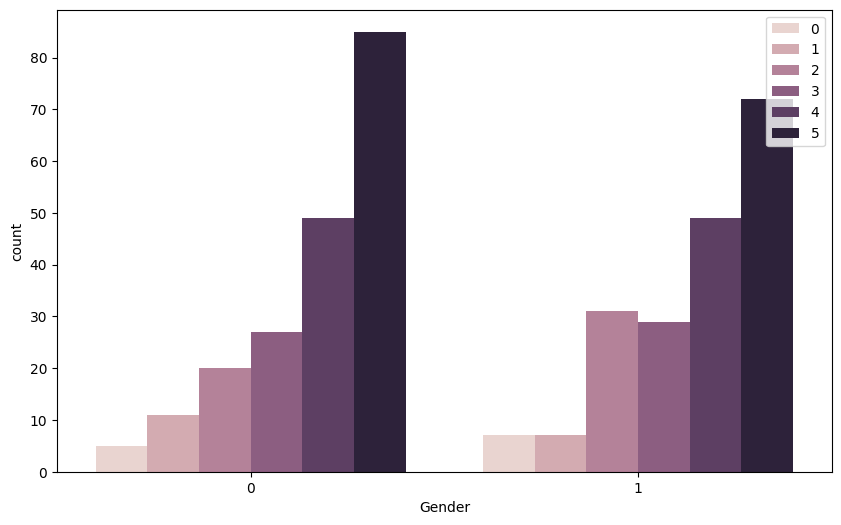

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x = "Gender", hue='Index')
plt.legend(loc='upper right')
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_9376\3473162235.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


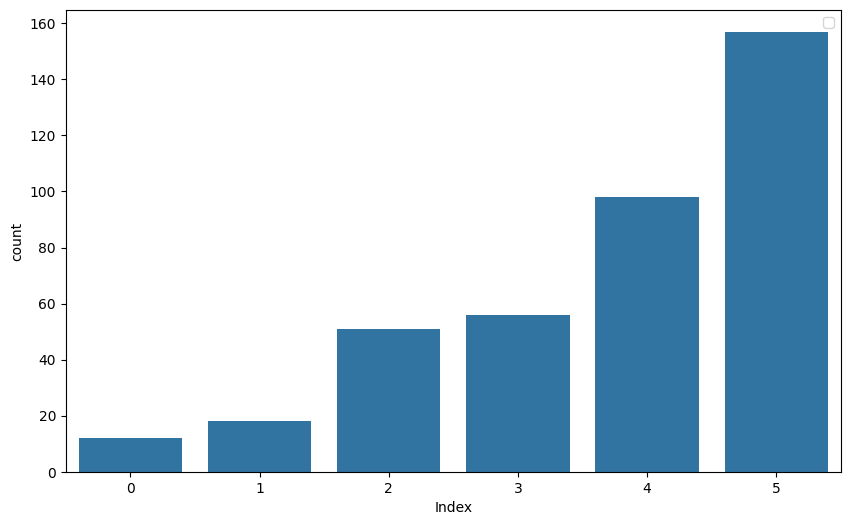

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x = "Index")
plt.legend(loc='upper right')
plt.show()

> **3. Create and Train KNN Classifier :**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn_clf.predict(x_test)

In [29]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
78,5,4
278,0,0
248,5,5
55,5,5
395,5,5
...,...,...
369,2,3
82,4,4
115,0,0
3,5,5


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
score = accuracy_score(y_test, y_pred)
score

0.8734177215189873

In [32]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  5,  1,  0,  0,  0],
       [ 0,  0,  8,  4,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  1, 15,  3],
       [ 0,  0,  0,  0,  1, 31]], dtype=int64)

In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.83      0.91         6
           2       0.89      0.67      0.76        12
           3       0.58      1.00      0.74         7
           4       0.94      0.79      0.86        19
           5       0.91      0.97      0.94        32

    accuracy                           0.87        79
   macro avg       0.89      0.88      0.87        79
weighted avg       0.90      0.87      0.87        79



In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Define Hyperparameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # k values
    'metric': ['euclidean', 'manhattan', 'minkowski']  # distance metrics
}


In [36]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [37]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [38]:
# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

best_k, best_metric

(9, 'manhattan')

In [39]:
# Train a KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [40]:
new_y_pred = best_knn.predict(x_test)

In [41]:
# Evaluate Best Model Performance

new_score = accuracy_score(y_test, new_y_pred)
new_matrix = confusion_matrix(y_test, new_y_pred)
new_report = classification_report(y_test, new_y_pred)

In [42]:
new_score

0.8734177215189873

In [43]:
new_matrix

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  5,  1,  0,  0,  0],
       [ 0,  0,  8,  4,  0,  0],
       [ 0,  0,  0,  6,  1,  0],
       [ 0,  0,  0,  0, 16,  3],
       [ 0,  0,  0,  0,  1, 31]], dtype=int64)

In [44]:
print(new_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.83      0.91         6
           2       0.89      0.67      0.76        12
           3       0.60      0.86      0.71         7
           4       0.89      0.84      0.86        19
           5       0.91      0.97      0.94        32

    accuracy                           0.87        79
   macro avg       0.88      0.86      0.86        79
weighted avg       0.89      0.87      0.87        79

